In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris_data = load_iris()

# Create a DataFrame for easier manipulation
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the species information to the DataFrame
iris_df['species'] = iris_data.target_names[iris_data.target]


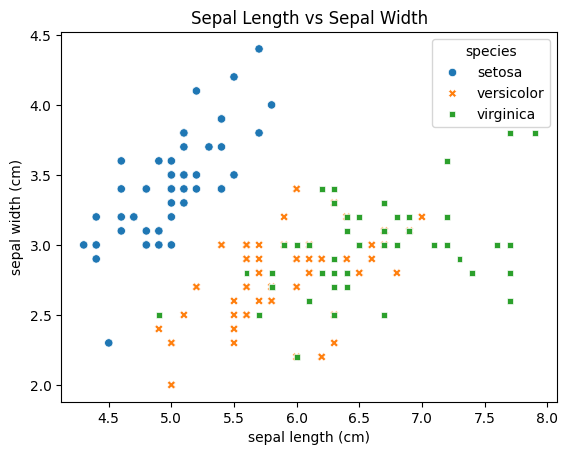

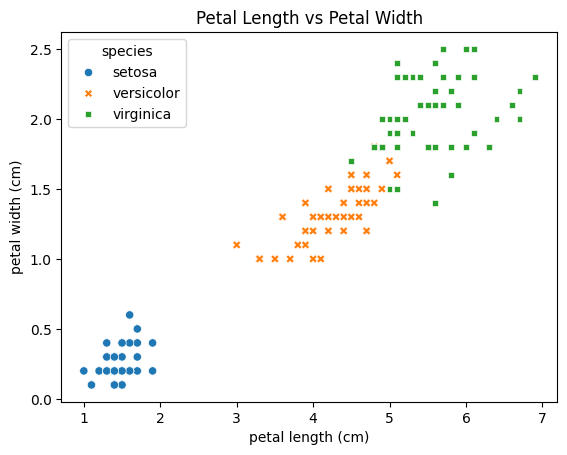

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for sepal length vs sepal width
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Scatter plot for petal length vs petal width
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', style='species')
plt.title('Petal Length vs Petal Width')
plt.show()


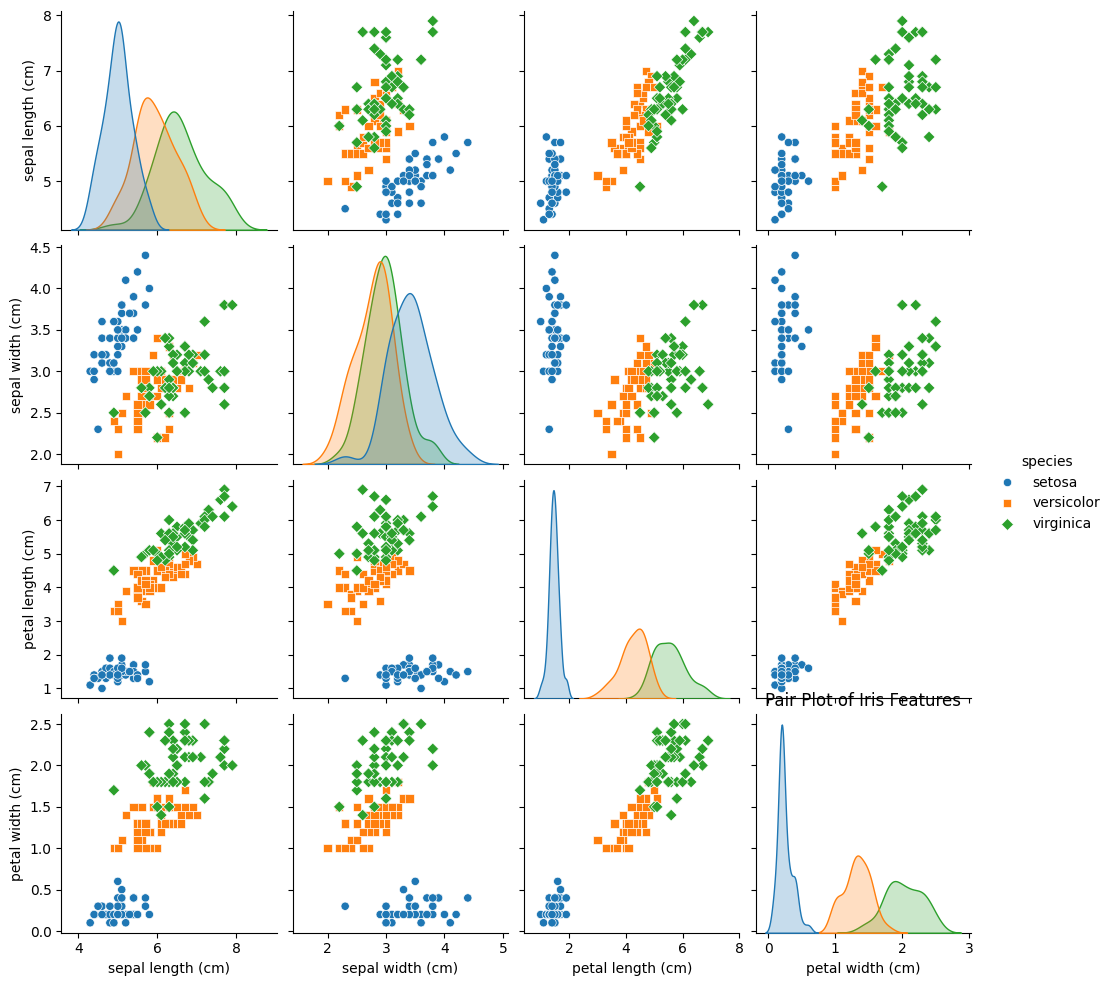

In [4]:
# Pair plot for the entire dataset
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.title('Pair Plot of Iris Features')
plt.show()


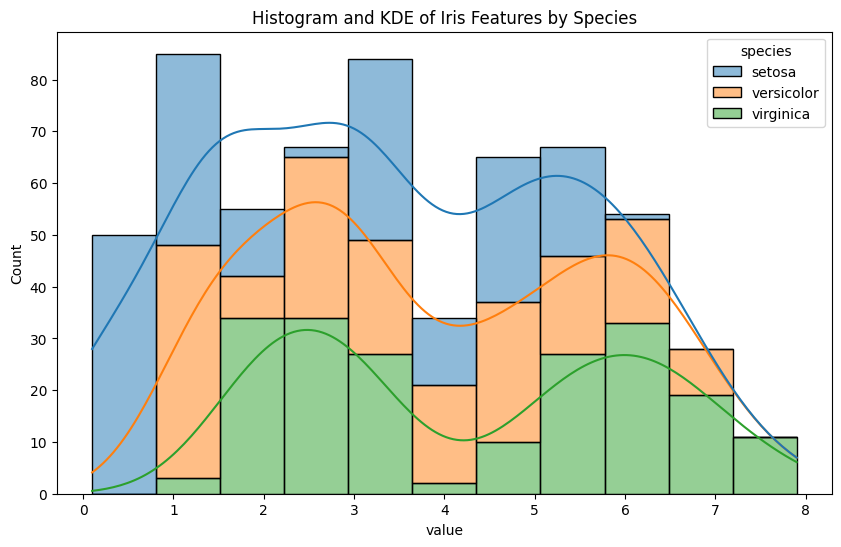

In [6]:
# Histogram with KDE for each feature by species
iris_melted = iris_df.melt(id_vars='species', var_name='feature', value_name='value')

plt.figure(figsize=(10, 6))
sns.histplot(data=iris_melted, x='value', hue='species', multiple='stack', kde=True)
plt.title('Histogram and KDE of Iris Features by Species')
plt.show()


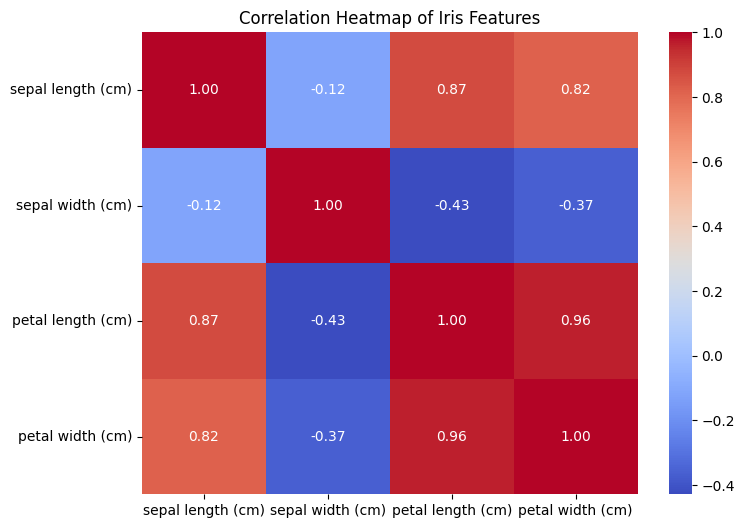

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()  # Exclude the 'species' column

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()


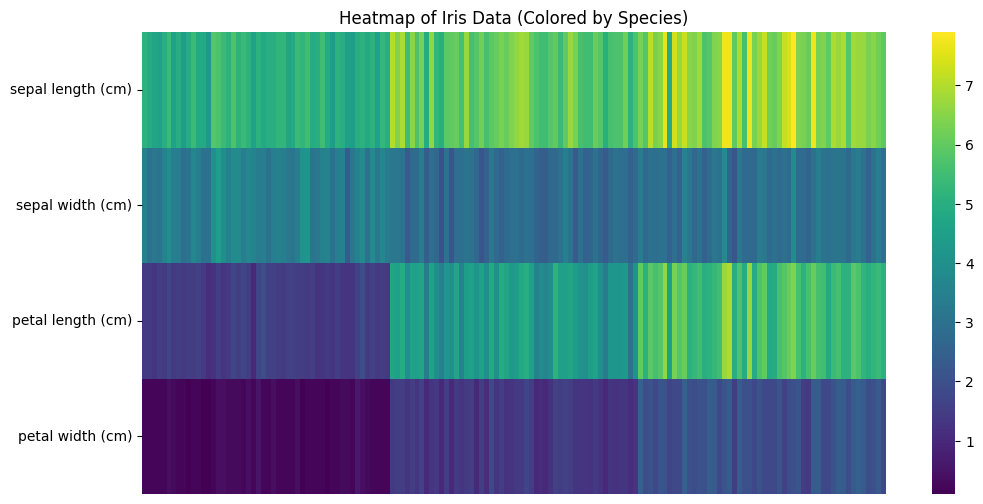

In [8]:
# Create a color-coded matrix for species (e.g., setosa=0, versicolor=1, virginica=2)
species_to_color = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

# Create a new DataFrame to represent the data in a matrix format with species as colors
data_matrix = iris_df.copy()
data_matrix['species'] = data_matrix['species'].map(species_to_color)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_matrix.iloc[:, :-1].T, cmap='viridis', cbar=True, xticklabels=False)
plt.title('Heatmap of Iris Data (Colored by Species)')
plt.show()


In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target_names[iris_data.target]

# Features and target labels
X = iris_df.iloc[:, :-1]
y = iris_df['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Define different models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM (Support Vector Machine)': SVC(),
    'k-NN (k-Nearest Neighbors)': KNeighborsClassifier()
}

# Evaluate each model using cross-validation
model_performance = {}

for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Store the mean and standard deviation of cross-validation scores
    model_performance[model_name] = (cv_scores.mean(), cv_scores.std())

# Find the best model based on mean accuracy
best_model_name = max(model_performance, key=lambda x: model_performance[x][0])
best_model = models[best_model_name]

print(f"The best model is: {best_model_name} with an average accuracy of {model_performance[best_model_name][0]:.2f}")

# Train the best model
best_model.fit(X_train, y_train)

# Test the model on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the best model on the test set: {test_accuracy:.2f}")


The best model is: Logistic Regression with an average accuracy of 0.97
Accuracy of the best model on the test set: 1.00


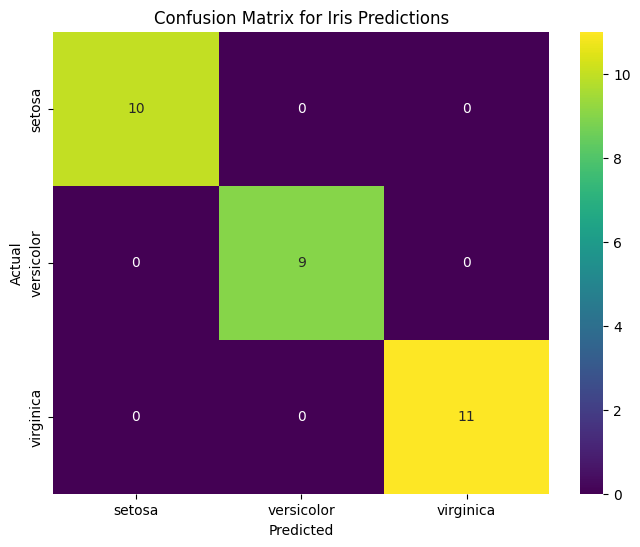

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Predictions')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16912\3185381502.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




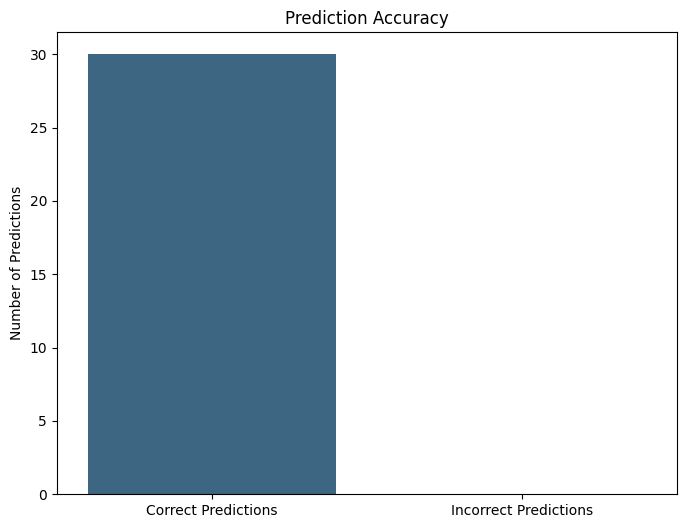

In [22]:
# Calculate the number of correct predictions
correct_predictions = (y_test == y_pred).sum()
total_predictions = len(y_test)

# Create a simple bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct Predictions', 'Incorrect Predictions'], y=[correct_predictions, total_predictions - correct_predictions], palette='viridis',legend=False)
plt.ylabel('Number of Predictions')
plt.title('Prediction Accuracy')
plt.show()
